# **Coffee and restaurant Sales Predictions**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import json
import ast

In [ ]:
do = pd.read_excel("/content/Orders3_sales.xlsx")

# **Visualize Time series**

**Prepare data**

Text(0.5, 1.0, 'restaurant & café')

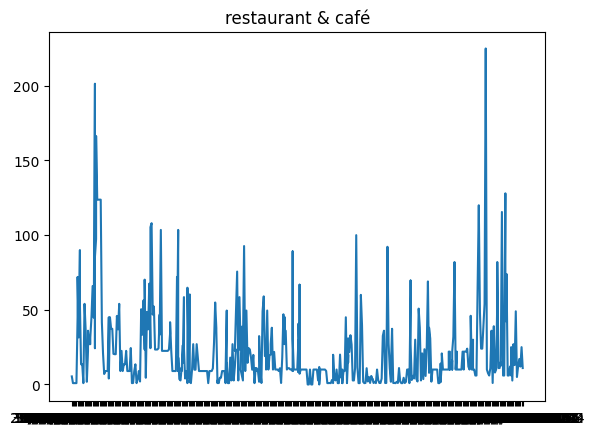

In [ ]:
Sales = pd.Series(list(do['total']), index=list(do['date']))
plt.plot(Sales)
plt.title('restaurant & café')

In [ ]:
Sales = do['total']
Time = do['date']

Text(0.5, 1.0, 'restaurant & café')

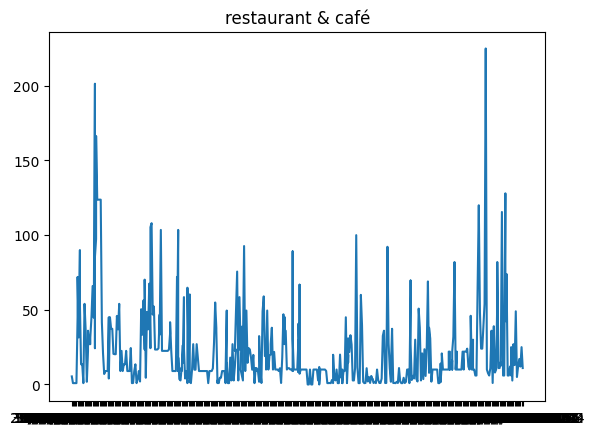

In [ ]:
plt.figure()
plt.plot(Time,Sales)
plt.title('restaurant & café')

In [ ]:
Time_Drinks=[]
Time_Food=[]
Sales_Drinks=[]
Sales_Food=[]
for i in range(len(Time)):
    if (do['article.category_name'][i]=='Drinks') :
      Time_Drinks.append(Time[i])
      Sales_Drinks.append(Sales[i])
    else :
      Time_Food.append(Time[i])
      Sales_Food.append(Sales[i])


Text(0.5, 1.0, 'Drinks sales')

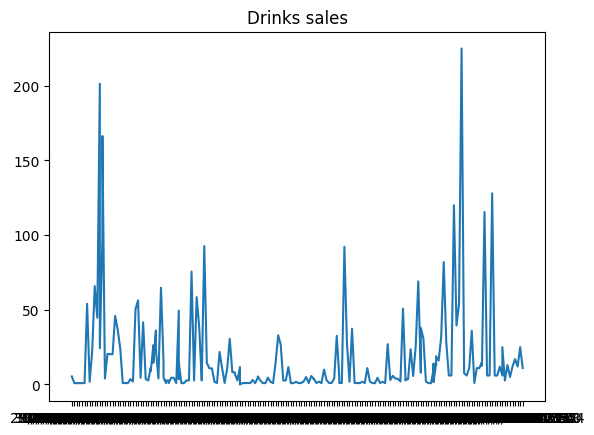

In [ ]:
Drinks = pd.Series(Sales_Drinks, index=Time_Drinks)
plt.plot(Drinks)
plt.title('Drinks sales')

Text(0.5, 1.0, 'restaurant sales')

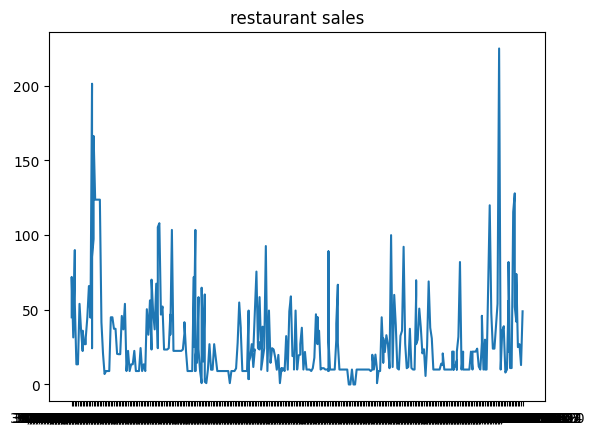

In [ ]:
Food = pd.Series(Sales_Food, index=Time_Food)
plt.plot(Food)
plt.title('restaurant sales')

# Split the data

In [ ]:
# Define the split time
split_time_Drinks = int(len(Time_Drinks)*0.8) #70% training ; 30% validation
split_time_Food = int(len(Time_Food)*0.8)

# Get the train set
## Drinks
time_train_Drinks = Time[:split_time_Drinks]
x_train_Drinks = Sales[:split_time_Drinks]
## Food
time_train_Food = Time[:split_time_Food]
x_train_Food = Sales[:split_time_Food]


# Get the validation set
## Drinks
time_valid_Drinks = Time[split_time_Drinks:]
x_valid_Drinks = Sales[split_time_Drinks:]
## Food
time_valid_Food = Time[split_time_Food:]
x_valid_Food = Sales[split_time_Food:]

In [ ]:
Valid_Food = pd.Series(x_valid_Food, index=time_valid_Food)
Valid_Drinks = pd.Series(x_valid_Drinks, index=time_valid_Drinks)


# Evaluating the data : ACF AC

**Full Data visualize**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
# Select relevant data, index by Date
data = do[['date', 'total']].set_index(['date'])

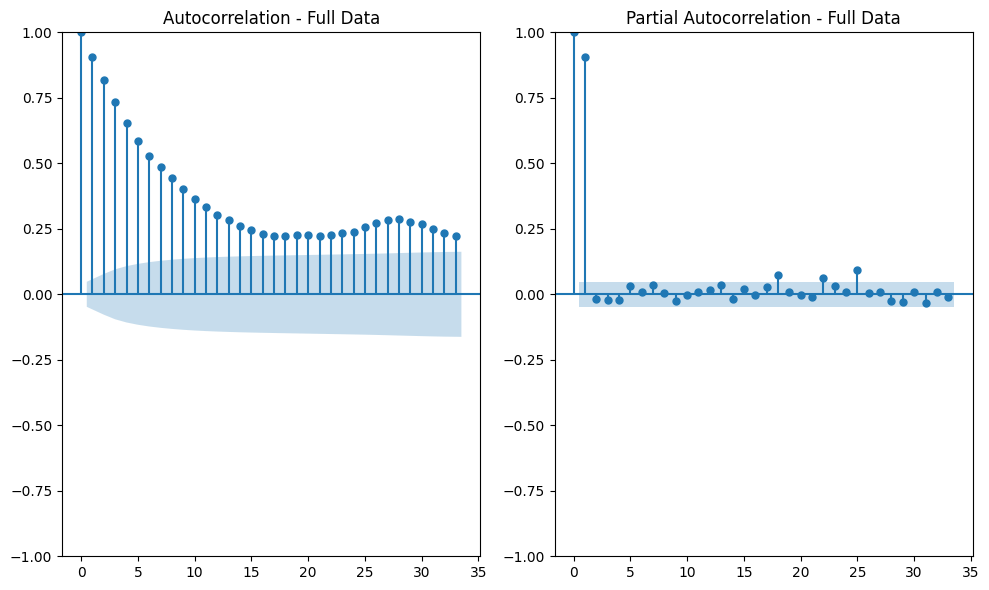

In [ ]:
# Calculate the ACF (via statsmodel)
#plot_acf(data)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot autocorrelation in the top-left subplot
plot_acf(data, ax=axes[0])
axes[0].set_title('Autocorrelation - Full Data')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data, ax=axes[1])
axes[1].set_title('Partial Autocorrelation - Full Data')


plt.tight_layout()
plt.show()

**Drinks Visulaize**

In [ ]:
data_Drinks = pd.DataFrame(Sales_Drinks)

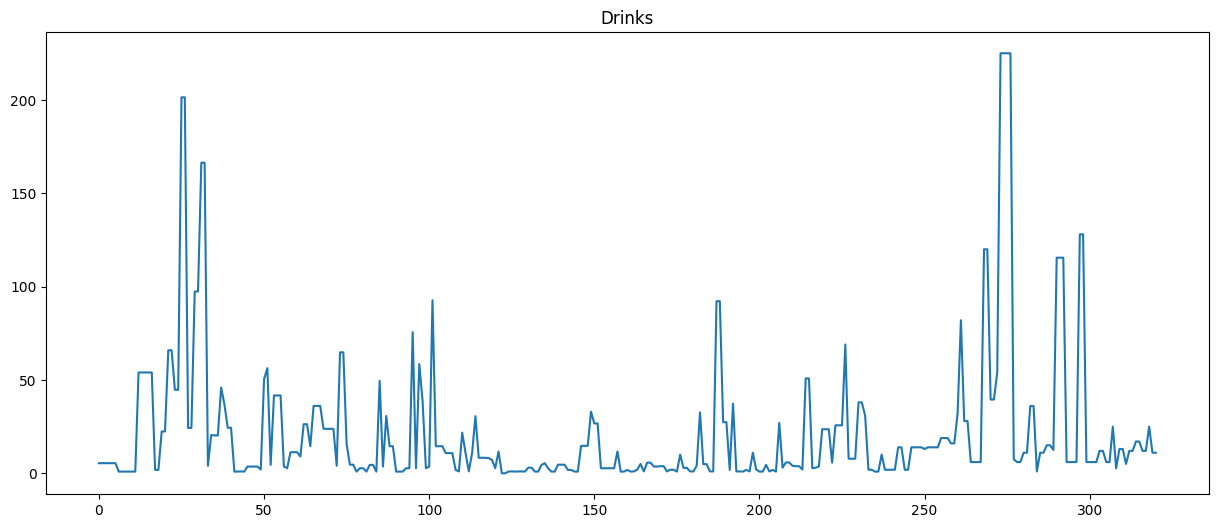

In [ ]:
plt.subplots(1, 1, figsize=(15, 6))

plt.plot(data_Drinks)
plt.title('Drinks')
plt.show()

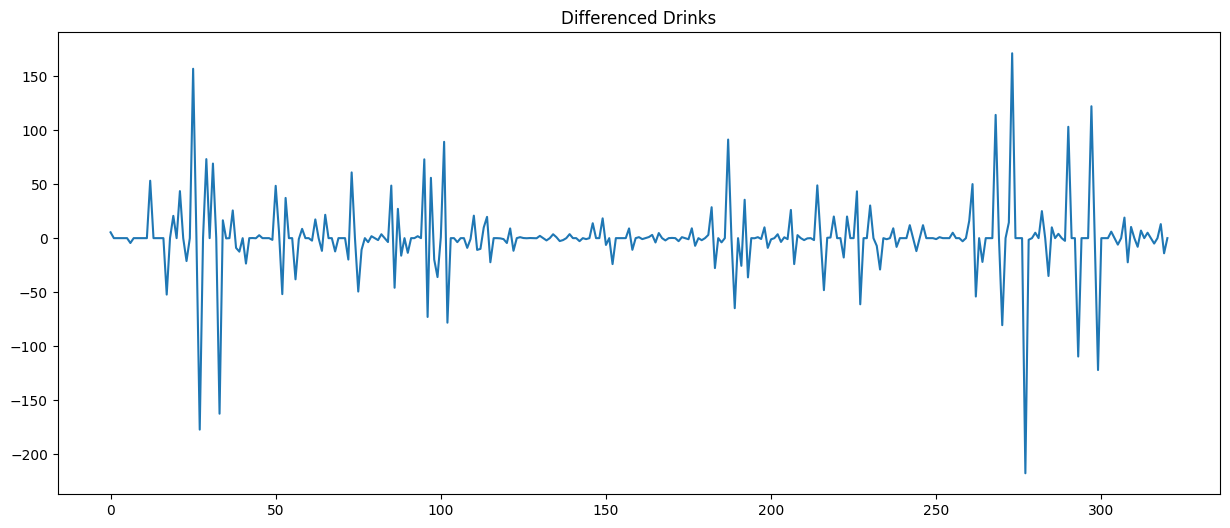

In [ ]:
plt.subplots(1, 1, figsize=(15, 6))

data_Drinks1=data_Drinks.diff().fillna(data_Drinks)
plt.plot(data_Drinks1)
plt.title('Differenced Drinks')
plt.show()

adf test

In [ ]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [ ]:
#check stationarity
perform_adf_test(data_Drinks1)
#adfuller(data_Drinks1)

ADF Statistic: -7.712705
p-value: 0.000000


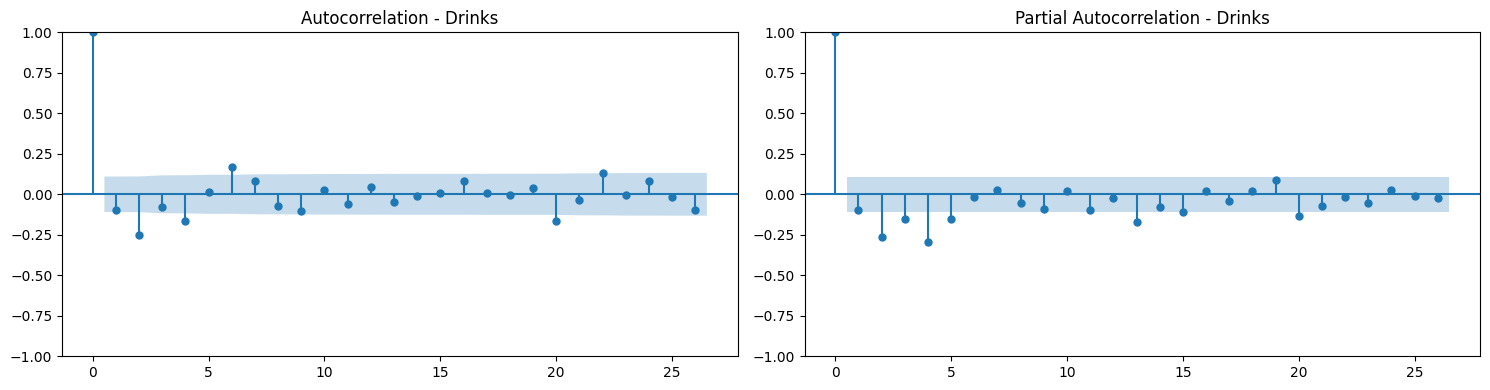

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot autocorrelation in the top-left subplot
plot_acf(data_Drinks1, ax=axes[0])
axes[0].set_title('Autocorrelation - Drinks')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_Drinks1, ax=axes[1])
axes[1].set_title('Partial Autocorrelation - Drinks')


plt.tight_layout()
plt.show()

<Figure size 4000x2400 with 0 Axes>

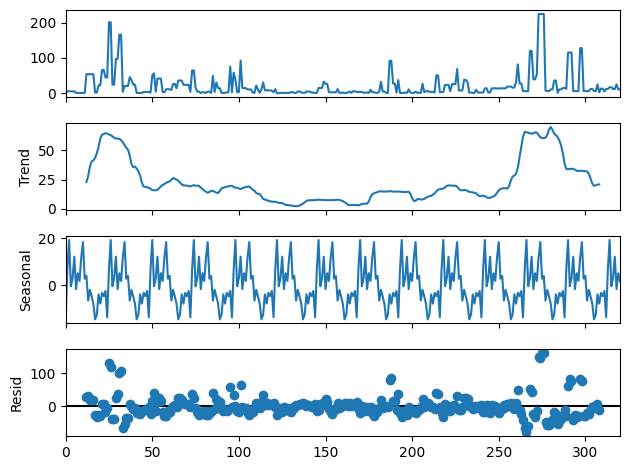

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_Drinks, model='additive', period=24) #24hours
#plt.subplots(4, 1, figsize=(15, 3))

plt.figure(figsize=(40, 24))
result.plot()
plt.show()

**Food visulaize**

In [ ]:
data_Food = pd.DataFrame(Sales_Food)

<Figure size 4000x2400 with 0 Axes>

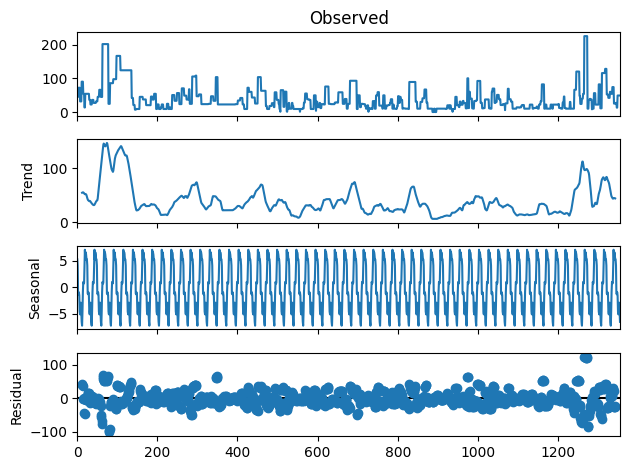

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(Sales_Food, model='additive', period=24) #24hours
#plt.subplots(4, 1, figsize=(15, 3))

plt.figure(figsize=(40, 24))
result.plot()
plt.show()

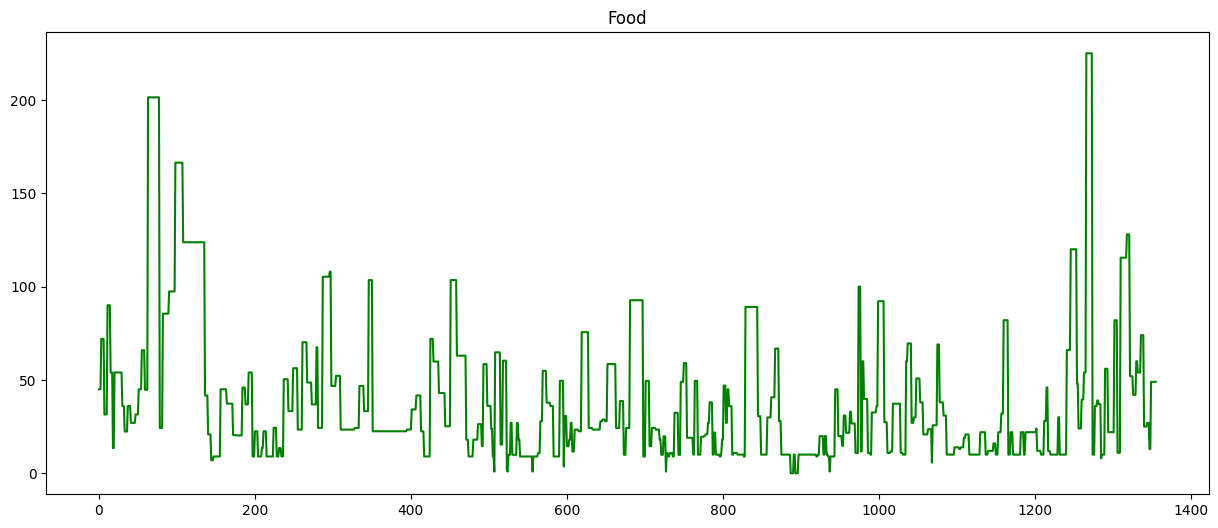

In [ ]:
plt.subplots(1, 1, figsize=(15, 6))

plt.plot(data_Food, c="g")
plt.title('Food')
plt.show()

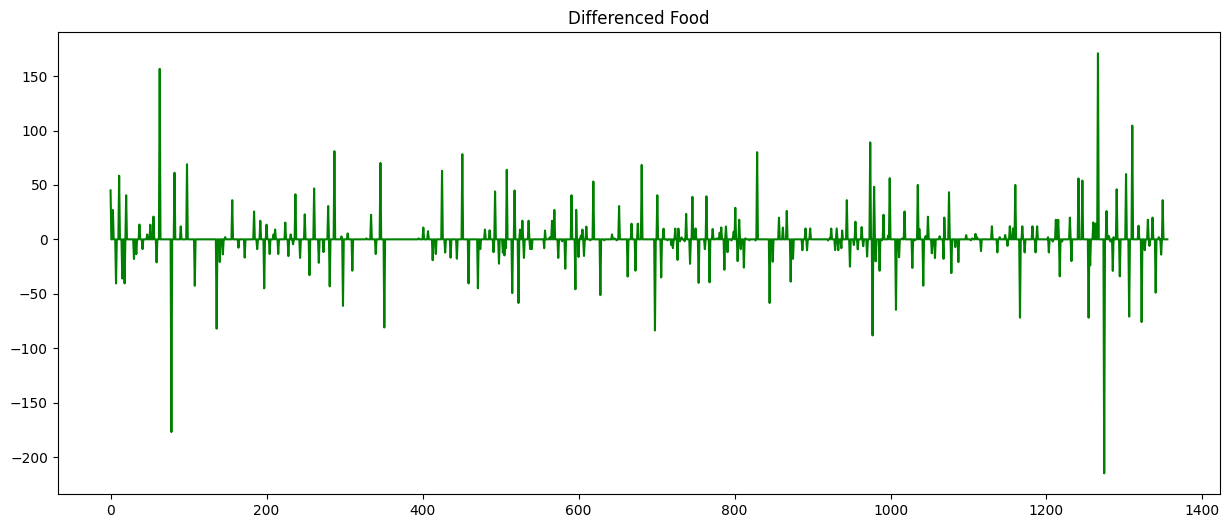

In [ ]:
plt.subplots(1, 1, figsize=(15, 6))

data_Food1=data_Food.diff().fillna(data_Food)
plt.plot(data_Food1, c='g')
plt.title('Differenced Food')
plt.show()

adf test

In [ ]:
#check stationarity
perform_adf_test(data_Food1)
#adfuller(data_Food1)

ADF Statistic: -11.786136
p-value: 0.000000


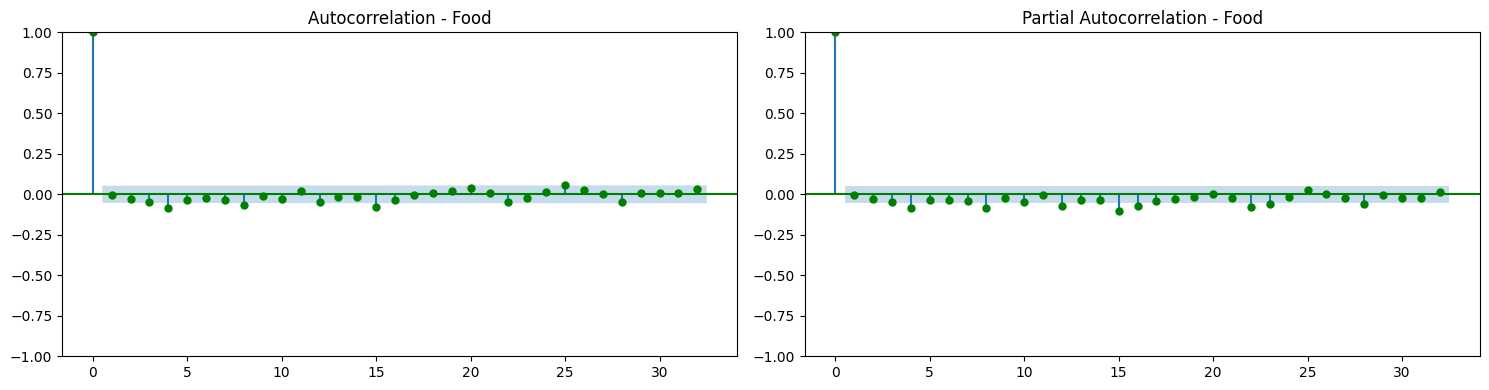

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot autocorrelation in the top-left subplot
plot_acf(data_Food1, ax=axes[0], c='g')
axes[0].set_title('Autocorrelation - Food')

# Plot partial autocorrelation in the top-right subplot
plot_pacf(data_Food1, ax=axes[1], c='g')
axes[1].set_title('Partial Autocorrelation - Food')


plt.tight_layout()
plt.show()

In [ ]:
'''
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_Food, model='additive', period=24) #24hours
plt.figure(figsize=(36, 24))
result.plot()
plt.show()
'''

"\nfrom statsmodels.tsa.seasonal import seasonal_decompose\nresult = seasonal_decompose(data_Food, model='additive', period=24) #24hours\nplt.figure(figsize=(36, 24))\nresult.plot()\nplt.show()\n"

# Train the model using ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

**Drinks**

In [ ]:
model = ARIMA(data_Drinks1, order=(6,0,5))  #order=(6,0,5))  #order=(20,0,13))
model_fit_Drinks = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_fit_Drinks.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  321
Model:               ARIMA(20, 0, 13)   Log Likelihood               -1519.677
Date:                Wed, 27 Sep 2023   AIC                           3109.353
Time:                        11:40:32   BIC                           3241.354
Sample:                             0   HQIC                          3162.058
                                - 321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0155      0.088      0.176      0.861      -0.158       0.189
ar.L1         -0.5699      2.048     -0.278      0.781      -4.583       3.443
ar.L2         -0.9023      1.906     -0.473      0.6

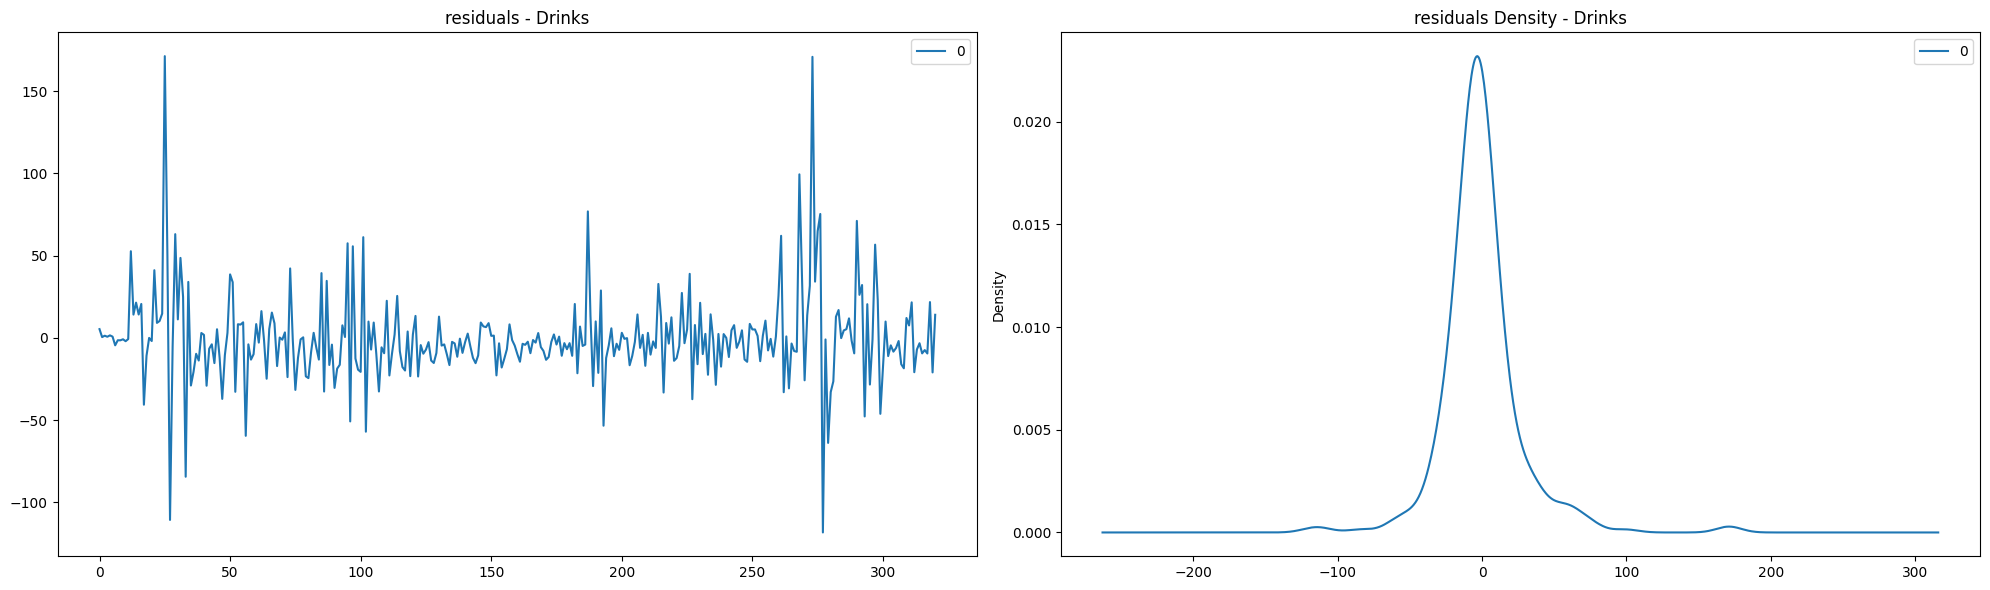

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals_Drinks = pd.DataFrame(model_fit_Drinks.resid)
residuals_Drinks.plot(ax=axes[0])
axes[0].set_title('residuals - Drinks')

# density plot of residuals
residuals_Drinks.plot(kind='kde',ax=axes[1])
axes[1].set_title('residuals Density - Drinks')

plt.tight_layout()
plt.show()

In [ ]:
# summary stats of residuals
print(residuals_Drinks.describe())

                0
count  321.000000
mean    -0.362033
std     27.596148
min   -118.216540
25%    -11.553359
50%     -2.489158
75%      7.877152
max    171.329351


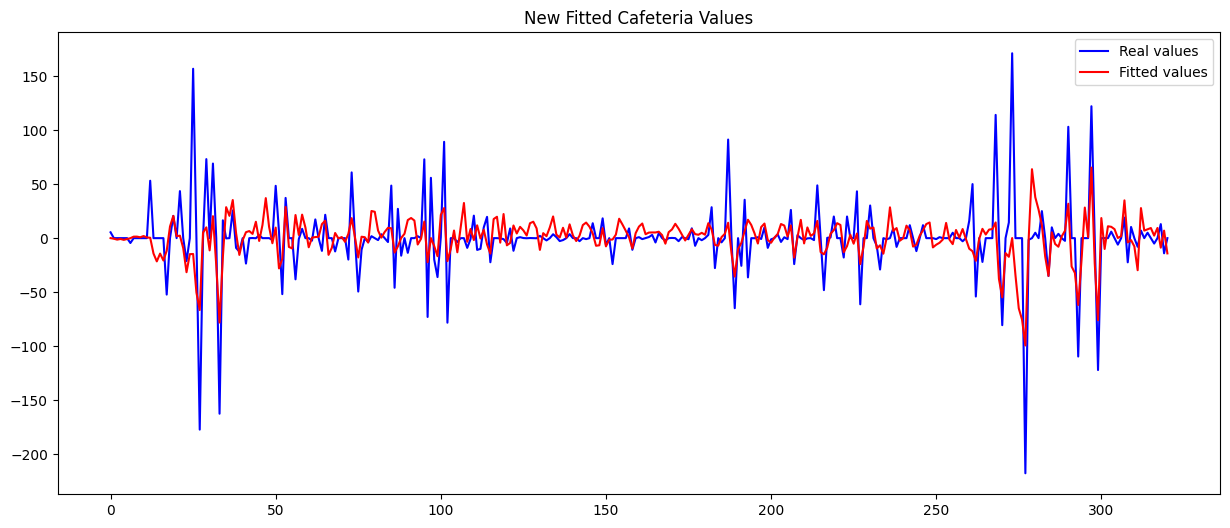

In [ ]:
plt.subplots(1, 1, figsize=(15, 6))

plt.plot(data_Drinks1, color='b')
plt.plot(model_fit_Drinks.fittedvalues, color='r')
plt.title('Fitted Cafeteria Values')
plt.legend(['Real values','Fitted values'])
plt.show()

# **==> La valeur du résidus est pratiquement nulle, Le modèle traduit bien les données**

**Food**

In [ ]:
model = ARIMA(data_Food1, order=(8,0,8))
model_fit_Food = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(model_fit_Food.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 1356
Model:                 ARIMA(8, 0, 8)   Log Likelihood               -5720.859
Date:                Wed, 27 Sep 2023   AIC                          11477.717
Time:                        11:40:47   BIC                          11571.539
Sample:                             0   HQIC                         11512.846
                               - 1356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0171      0.020     -0.841      0.400      -0.057       0.023
ar.L1         -0.9958      0.275     -3.622      0.000      -1.535      -0.457
ar.L2         -0.6180      0.120     -5.158      0.0

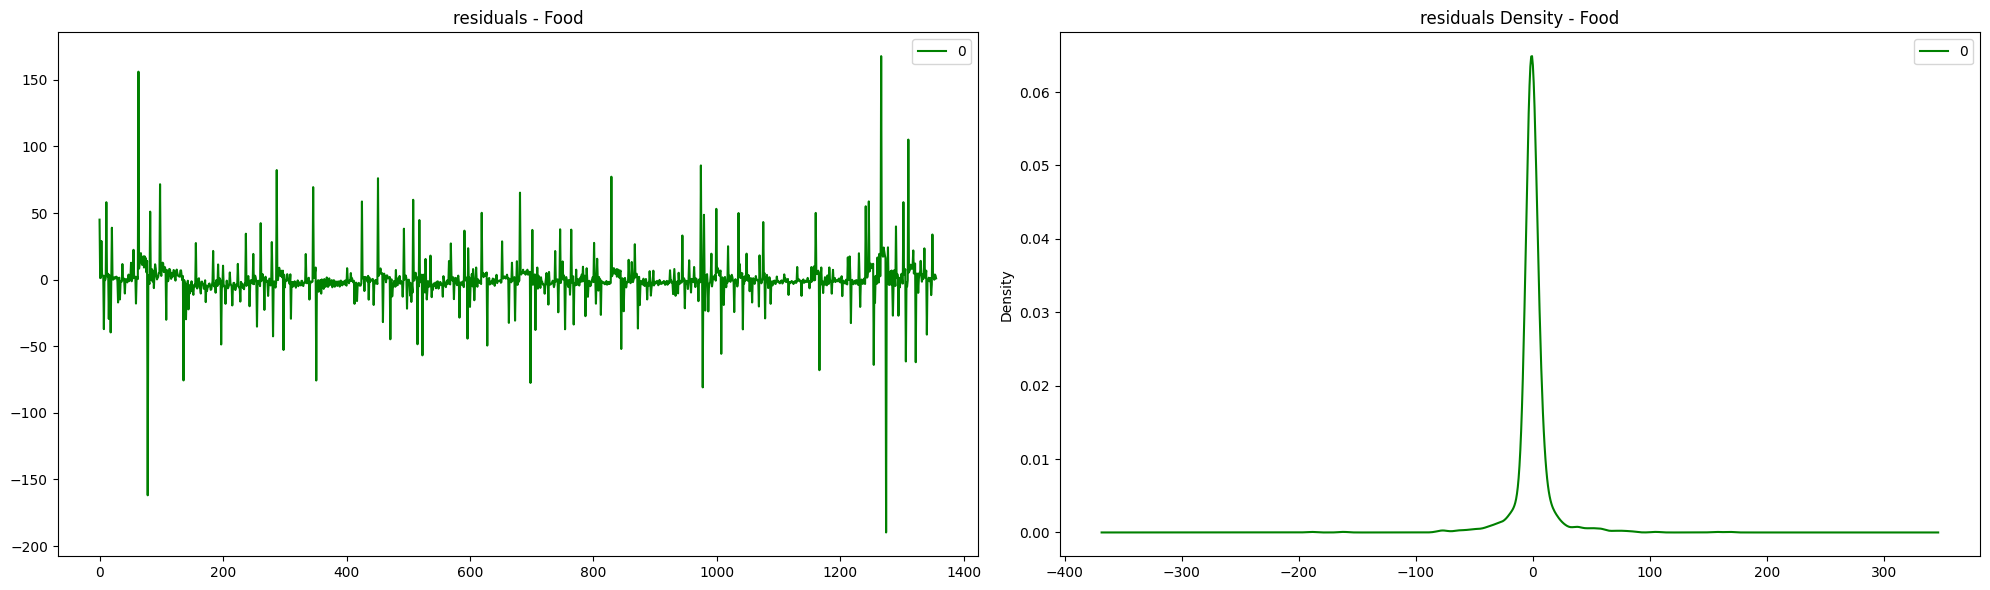

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# line plot of residuals
residuals_Food = pd.DataFrame(model_fit_Food.resid)
residuals_Food.plot(ax=axes[0],c='g')
axes[0].set_title('residuals - Food')

# density plot of residuals
residuals_Food.plot(kind='kde',ax=axes[1],c='g')
axes[1].set_title('residuals Density - Food')

plt.tight_layout()
plt.show()

In [ ]:
# summary stats of residuals
print(residuals_Food.describe())

                 0
count  1356.000000
mean     -0.202200
std      16.460413
min    -189.831857
25%      -3.139878
50%      -0.965669
75%       2.311482
max     167.768327


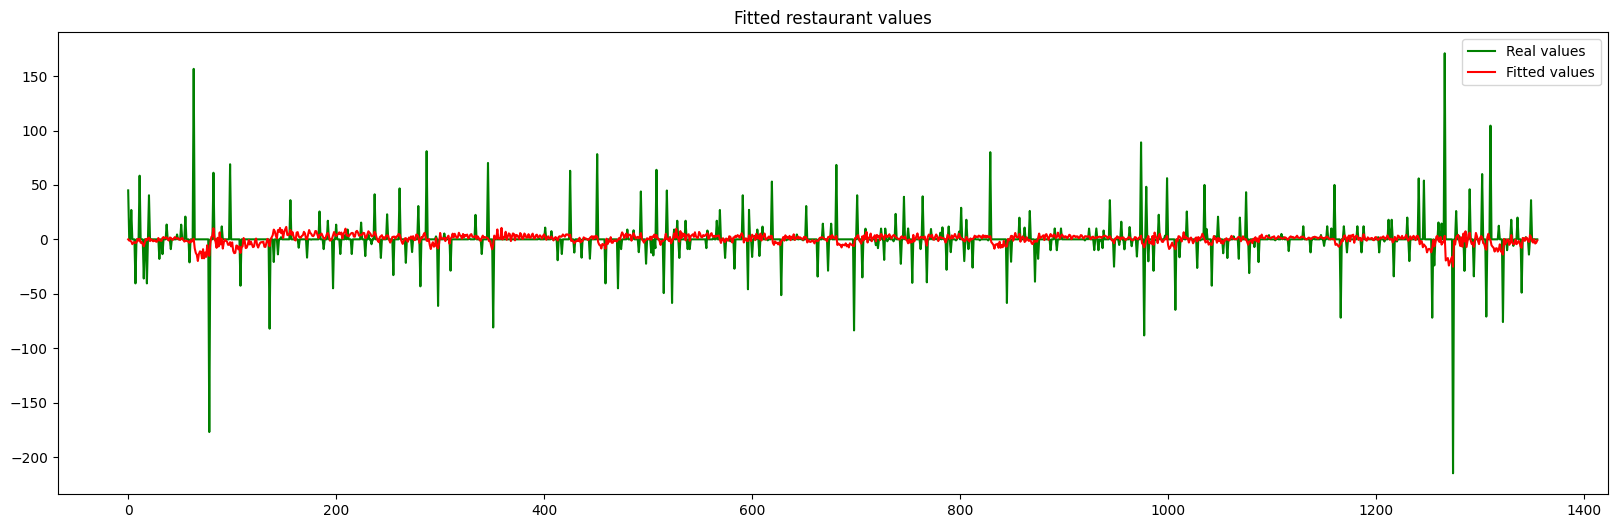

In [ ]:
plt.subplots(1, 1, figsize=(20, 6))

plt.plot(data_Food1,color='g')
plt.plot(model_fit_Food.fittedvalues, color='r')
plt.title('Fitted restaurant values')
plt.legend(['Real values','Fitted values'])

plt.show()

# **==> La valeur du résidus est pratiquement nulle, Le modèle traduit bien les données**

# Predictions

In [ ]:
Valid_Drinks
Valid_Food

date
17/07/2023 13:34   NaN
17/07/2023 13:34   NaN
17/07/2023 13:35   NaN
17/07/2023 13:35   NaN
17/07/2023 13:42   NaN
                    ..
08/08/2023 12:58   NaN
08/08/2023 12:58   NaN
08/08/2023 13:00   NaN
08/08/2023 13:04   NaN
08/08/2023 13:04   NaN
Name: total, Length: 593, dtype: float64

In [ ]:
#pd.DataFrame(time_valid,x_valid).set_axis([ 'B', 'C'], axis='columns', inplace=True)

In [ ]:
from datetime import datetime
start_pred_Drinks = Valid_Drinks.index[0]
end_pred_Drinks = Valid_Drinks.index[-1]

In [ ]:
type(end_pred_Drinks)

str

In [ ]:
#start_pred_Drinks = datetime.strptime(start_pred_Drinks,'%d/%m/%Y %H:%M')
#end_pred_Drinks = datetime.strptime(end_pred_Drinks,'%d/%m/%Y %H:%M')
#pd.to_datetime(Valid_Drinks.index,unit='D')

#start_pred_Drinks = datetime.fromtimestamp(start_pred_Drinks)
#end_pred_Drinks = datetime.fromtimestamp(end_pred_Drinks)

In [ ]:

start_pred_Drinks1 = start_pred_Drinks.to_pydatetime()
type(end_pred_Drinks1)



In [ ]:
end_pred_Drinks


index to datetime

In [ ]:
Valid_Drinks.index = pd.to_datetime(Valid_Drinks.index)
type(Valid_Drinks.index)

In [ ]:
predictions = model_fit_Drinks.predict(start=start_pred_Drinks, end=end_pred_Drinks)
#predictions = model_fit_Drinks.predict(Valid_Drinks)

In [ ]:
predictions = model_fit_Drinks.forecast(len(Valid_Drinks))
predictions = pd.Series(predictions, index=Valid_Drinks.index)

In [ ]:
plt.subplots(1,1,figsize=(15,5))

plt.plot(Drinks, c='b')
plt.plot(predictions, c='r')

plt.show()

In [ ]:
#mse = tf.keras.metrics.mean_squared_error(data, predictions).numpy()
#mae = tf.keras.metrics.mean_absolute_error(data, predictions).numpy()